In [1]:
def get_obj_values(run_gen_text_content: str):
    output_list = []
    for solution_text in run_gen_text_content.split("--------------")[:-1]:
        run_gen_solution_text_content = solution_text
        output_list.append([float(item[item.find(': ')+2:]) for item in run_gen_solution_text_content[run_gen_solution_text_content.find(']')+1:].split('\n')[1:-1]])
    return output_list

In [2]:
import os

def load_runs_and_gens_as_dict(directory="."):
    data = {}
    run_index = 0

    while True:
        run_key = f"run_{run_index}"
        gen_index = 0
        run_data = []

        while True:
            filename = f"{run_key}_gen_{gen_index}.txt"
            filepath = os.path.join(directory, filename)

            if os.path.isfile(filepath):
                with open(filepath, 'r', encoding='utf-8') as f:
                    run_data.append(get_obj_values(f.read()))
                gen_index += 1
            else:
                break  # No more gens for this run

        if run_data:
            data[run_key] = run_data
            run_index += 1
        else:
            break  # No more runs

    return data


In [3]:
run_gen_dict = load_runs_and_gens_as_dict()
run_gen_dict

{'run_0': [[[0.48, 0.65, 0.43],
   [0.52, 0.61, 0.45],
   [0.59, 0.61, 0.38],
   [0.53, 0.62, 0.42],
   [0.54, 0.61, 0.43],
   [0.65, 0.59, 0.38],
   [0.51, 0.65, 0.41]],
  [[0.52, 0.61, 0.45],
   [0.59, 0.61, 0.38],
   [0.54, 0.61, 0.43],
   [0.65, 0.59, 0.38],
   [0.6, 0.61, 0.31],
   [0.55, 0.63, 0.38],
   [0.49, 0.64, 0.37],
   [0.54, 0.59, 0.52],
   [0.46, 0.62, 0.4]],
  [[0.59, 0.61, 0.38],
   [0.65, 0.59, 0.38],
   [0.6, 0.61, 0.31],
   [0.49, 0.64, 0.37],
   [0.54, 0.59, 0.52],
   [0.46, 0.62, 0.4],
   [0.51, 0.61, 0.4],
   [0.48, 0.6, 0.5],
   [0.61, 0.58, 0.42],
   [0.51, 0.63, 0.37],
   [0.58, 0.6, 0.42]]],
 'run_1': [[[0.61, 0.75, 0.22],
   [0.66, 0.74, 0.36],
   [0.55, 0.76, 0.18],
   [0.45, 0.78, 0.23]],
  [[0.61, 0.75, 0.22],
   [0.55, 0.76, 0.18],
   [0.45, 0.78, 0.23],
   [0.59, 0.76, 0.17],
   [0.51, 0.76, 0.32],
   [0.52, 0.77, 0.22],
   [0.62, 0.74, 0.22],
   [0.58, 0.75, 0.28]],
  [[0.55, 0.76, 0.18],
   [0.45, 0.78, 0.23],
   [0.59, 0.76, 0.17],
   [0.52, 0.75, 0.

In [4]:
def dict_to_data_for_visualization(run_gen_values_dict: dict):
    all = {}
    for key,run in run_gen_values_dict.items():
        all[key] = {}
        for generation in run:
            all[key][run.index(generation)] = {}
            min_obj1 = min([solution[0] for solution in generation])
            min_obj2 = min([solution[1] for solution in generation])
            min_obj3 = min([solution[2] for solution in generation])
            avg_obj1 = sum([solution[0] for solution in generation]) / len(generation)
            avg_obj2 = sum([solution[1] for solution in generation]) / len(generation)
            avg_obj3 = sum([solution[2] for solution in generation]) / len(generation)

            all[key][run.index(generation)]["min_obj1"] = min_obj1
            all[key][run.index(generation)]["min_obj2"] = min_obj2
            all[key][run.index(generation)]["min_obj3"] = min_obj3

            all[key][run.index(generation)]["avg_obj1"] = avg_obj1
            all[key][run.index(generation)]["avg_obj2"] = avg_obj2
            all[key][run.index(generation)]["avg_obj3"] = avg_obj3

            print(f"For the run index {key} and generation index {run.index(generation)}:")
            print(f"MIN of objective index 0: {min_obj1}")
            print(f"MIN of objective index 1: {min_obj2}")
            print(f"MIN of objective index 2: {min_obj3}")
            print(f"AVG of objective index 0: {avg_obj1}")
            print(f"AVG of objective index 1: {avg_obj2}")
            print(f"AVG of objective index 2: {avg_obj3}")
            print("--------------")
    return all


visualization_data = dict_to_data_for_visualization(run_gen_dict)
visualization_data

For the run index run_0 and generation index 0:
MIN of objective index 0: 0.48
MIN of objective index 1: 0.59
MIN of objective index 2: 0.38
AVG of objective index 0: 0.5457142857142857
AVG of objective index 1: 0.62
AVG of objective index 2: 0.41428571428571426
--------------
For the run index run_0 and generation index 1:
MIN of objective index 0: 0.46
MIN of objective index 1: 0.59
MIN of objective index 2: 0.31
AVG of objective index 0: 0.548888888888889
AVG of objective index 1: 0.6122222222222222
AVG of objective index 2: 0.40222222222222226
--------------
For the run index run_0 and generation index 2:
MIN of objective index 0: 0.46
MIN of objective index 1: 0.58
MIN of objective index 2: 0.31
AVG of objective index 0: 0.5472727272727272
AVG of objective index 1: 0.6072727272727273
AVG of objective index 2: 0.4063636363636363
--------------
For the run index run_1 and generation index 0:
MIN of objective index 0: 0.45
MIN of objective index 1: 0.74
MIN of objective index 2: 0.18

{'run_0': {0: {'min_obj1': 0.48,
   'min_obj2': 0.59,
   'min_obj3': 0.38,
   'avg_obj1': 0.5457142857142857,
   'avg_obj2': 0.62,
   'avg_obj3': 0.41428571428571426},
  1: {'min_obj1': 0.46,
   'min_obj2': 0.59,
   'min_obj3': 0.31,
   'avg_obj1': 0.548888888888889,
   'avg_obj2': 0.6122222222222222,
   'avg_obj3': 0.40222222222222226},
  2: {'min_obj1': 0.46,
   'min_obj2': 0.58,
   'min_obj3': 0.31,
   'avg_obj1': 0.5472727272727272,
   'avg_obj2': 0.6072727272727273,
   'avg_obj3': 0.4063636363636363}},
 'run_1': {0: {'min_obj1': 0.45,
   'min_obj2': 0.74,
   'min_obj3': 0.18,
   'avg_obj1': 0.5675,
   'avg_obj2': 0.7575000000000001,
   'avg_obj3': 0.2475},
  1: {'min_obj1': 0.45,
   'min_obj2': 0.74,
   'min_obj3': 0.17,
   'avg_obj1': 0.55375,
   'avg_obj2': 0.75875,
   'avg_obj3': 0.23},
  2: {'min_obj1': 0.45,
   'min_obj2': 0.73,
   'min_obj3': 0.17,
   'avg_obj1': 0.5428571428571428,
   'avg_obj2': 0.7542857142857143,
   'avg_obj3': 0.21}}}

{0: {'min_obj1': 0.48, 'min_obj2': 0.59, 'min_obj3': 0.38, 'avg_obj1': 0.5457142857142857, 'avg_obj2': 0.62, 'avg_obj3': 0.41428571428571426}, 1: {'min_obj1': 0.46, 'min_obj2': 0.59, 'min_obj3': 0.31, 'avg_obj1': 0.548888888888889, 'avg_obj2': 0.6122222222222222, 'avg_obj3': 0.40222222222222226}, 2: {'min_obj1': 0.46, 'min_obj2': 0.58, 'min_obj3': 0.31, 'avg_obj1': 0.5472727272727272, 'avg_obj2': 0.6072727272727273, 'avg_obj3': 0.4063636363636363}}


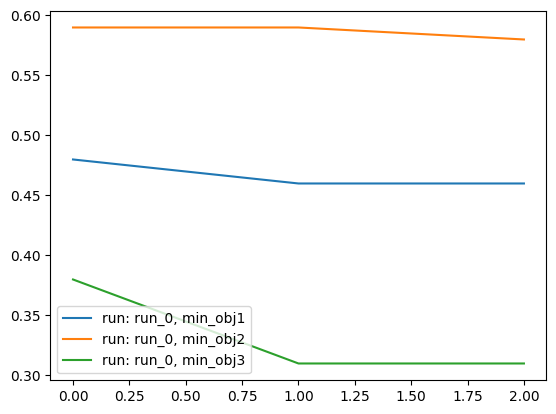

{0: {'min_obj1': 0.45, 'min_obj2': 0.74, 'min_obj3': 0.18, 'avg_obj1': 0.5675, 'avg_obj2': 0.7575000000000001, 'avg_obj3': 0.2475}, 1: {'min_obj1': 0.45, 'min_obj2': 0.74, 'min_obj3': 0.17, 'avg_obj1': 0.55375, 'avg_obj2': 0.75875, 'avg_obj3': 0.23}, 2: {'min_obj1': 0.45, 'min_obj2': 0.73, 'min_obj3': 0.17, 'avg_obj1': 0.5428571428571428, 'avg_obj2': 0.7542857142857143, 'avg_obj3': 0.21}}


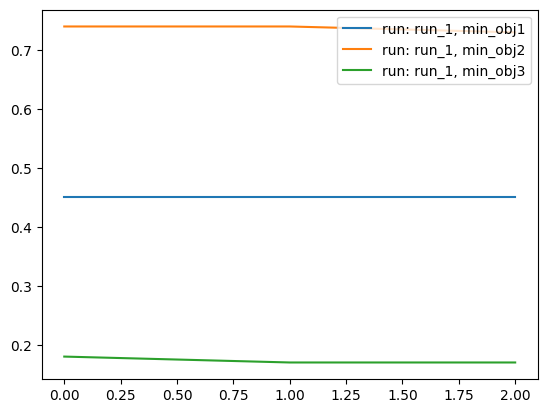

In [ ]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        min_obj1_values = []
        min_obj2_values = []
        min_obj3_values = []
        # avg_obj1_values = []
        # avg_obj2_values = []
        # avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            min_obj1 = gen_values["min_obj1"]
            min_obj2 = gen_values["min_obj2"]
            min_obj3 = gen_values["min_obj3"]
            # avg_obj1 = gen_values["avg_obj1"]
            # avg_obj2 = gen_values["avg_obj2"]
            # avg_obj3 = gen_values["avg_obj3"]

            min_obj1_values.append(min_obj1)
            min_obj2_values.append(min_obj2)
            min_obj3_values.append(min_obj3)
            # avg_obj1_values.append(avg_obj1)
            # avg_obj2_values.append(avg_obj2)
            # avg_obj3_values.append(avg_obj3)

        plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        # plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        # plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        # plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)

{0: {'min_obj1': 0.48, 'min_obj2': 0.59, 'min_obj3': 0.38, 'avg_obj1': 0.5457142857142857, 'avg_obj2': 0.62, 'avg_obj3': 0.41428571428571426}, 1: {'min_obj1': 0.46, 'min_obj2': 0.59, 'min_obj3': 0.31, 'avg_obj1': 0.548888888888889, 'avg_obj2': 0.6122222222222222, 'avg_obj3': 0.40222222222222226}, 2: {'min_obj1': 0.46, 'min_obj2': 0.58, 'min_obj3': 0.31, 'avg_obj1': 0.5472727272727272, 'avg_obj2': 0.6072727272727273, 'avg_obj3': 0.4063636363636363}}


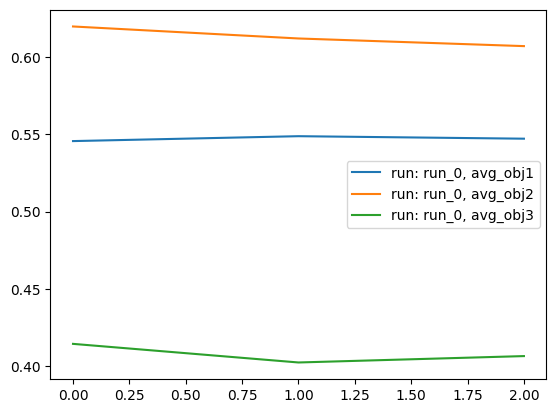

{0: {'min_obj1': 0.45, 'min_obj2': 0.74, 'min_obj3': 0.18, 'avg_obj1': 0.5675, 'avg_obj2': 0.7575000000000001, 'avg_obj3': 0.2475}, 1: {'min_obj1': 0.45, 'min_obj2': 0.74, 'min_obj3': 0.17, 'avg_obj1': 0.55375, 'avg_obj2': 0.75875, 'avg_obj3': 0.23}, 2: {'min_obj1': 0.45, 'min_obj2': 0.73, 'min_obj3': 0.17, 'avg_obj1': 0.5428571428571428, 'avg_obj2': 0.7542857142857143, 'avg_obj3': 0.21}}


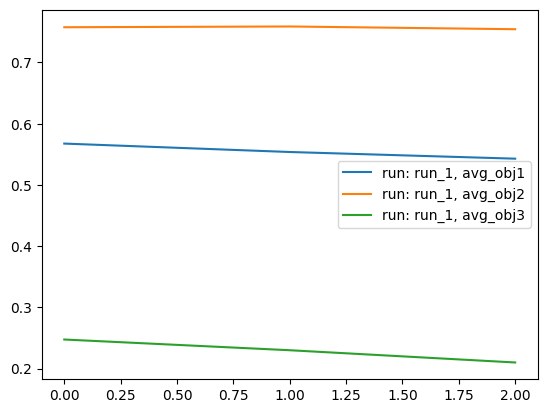

In [6]:
import matplotlib.pyplot as plt

def visualize(data_for_visualization: dict):
    for run, run_values in data_for_visualization.items():
        gens = []
        # min_obj1_values = []
        # min_obj2_values = []
        # min_obj3_values = []
        avg_obj1_values = []
        avg_obj2_values = []
        avg_obj3_values = []
        print(run_values)
        for gen, gen_values in run_values.items():
            gens.append(gen)
            # min_obj1 = gen_values["min_obj1"]
            # min_obj2 = gen_values["min_obj2"]
            # min_obj3 = gen_values["min_obj3"]
            avg_obj1 = gen_values["avg_obj1"]
            avg_obj2 = gen_values["avg_obj2"]
            avg_obj3 = gen_values["avg_obj3"]

            # min_obj1_values.append(min_obj1)
            # min_obj2_values.append(min_obj2)
            # min_obj3_values.append(min_obj3)
            avg_obj1_values.append(avg_obj1)
            avg_obj2_values.append(avg_obj2)
            avg_obj3_values.append(avg_obj3)

        # plt.plot(gens, min_obj1_values, label=f"run: {run}, min_obj1")
        # plt.plot(gens, min_obj2_values, label=f"run: {run}, min_obj2")
        # plt.plot(gens, min_obj3_values, label=f"run: {run}, min_obj3")
        plt.plot(gens, avg_obj1_values, label=f"run: {run}, avg_obj1")
        plt.plot(gens, avg_obj2_values, label=f"run: {run}, avg_obj2")
        plt.plot(gens, avg_obj3_values, label=f"run: {run}, avg_obj3")
        plt.legend()
        plt.show()

visualize(visualization_data)